In [1]:
## IMPORTANT !

# In the first order need to set the number of CPU 
# for calculation before launching (depends on computer's number of cores)
n_jobs= 50
#libraries
import pandas as pd
import numpy as np
import os
import sys
import shutil
import glob
import joblib
import warnings
from datetime import date, datetime

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
import scipy.stats as st

from nilearn import image as nli
from nilearn import plotting

#from mne.viz import plot_connectivity_circle
#from mne_connectivity.viz import plot_connectivity_circle

import copy

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from scipy.stats import bootstrap as bootstrap

def my_cor(x, y):
    return pearsonr(x, y)[0]

def my_r2(x, y):
    return r2_score(x, y)

def my_mae(x, y):
    return mean_absolute_error(x, y)

##### Path vars

In [2]:
path = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_5/'

In [3]:
path_out = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_5/'

##### Load data

In [4]:
val_pred={}
for file in sorted(glob.glob(path+'pred_vals_*')):
    val_pred[file.split('.')[0].split('/')[-1].replace('pred_vals_','')] = pd.read_csv(file, index_col=0)
    

##### Calculate  bootstsrapped indexes

In [6]:
cor_boot = {}
r2_boot = {}
mae_boot = {}

for key in sorted(val_pred.keys()):
    #key='A'
    print(key, datetime.now())

    dct_cor={}
    dct_r2={}
    dct_mae={}

    for col in val_pred[key].columns[:-2]:

        print(col, key, datetime.now())

        df_ = val_pred[key][['y_obs',col]]

        boot_cor = bootstrap(df_.T.values, 
                             my_cor, 
                             vectorized=False, paired=True, 
                             n_resamples=5000, confidence_level=0.95, method='BCa', random_state=42)

        boot_r2 = bootstrap(df_.T.values, 
                             my_r2, 
                             vectorized=False, paired=True, 
                             n_resamples=5000, confidence_level=0.95, method='BCa', random_state=42)  

        boot_mae = bootstrap(df_.T.values, 
                             my_mae, 
                             vectorized=False, paired=True, 
                             n_resamples=5000, confidence_level=0.95, method='BCa', random_state=42)      

        dct_cor[col] = pd.Series(boot_cor.bootstrap_distribution)
        dct_r2[col] = pd.Series(boot_r2.bootstrap_distribution)
        dct_mae[col] = pd.Series(boot_mae.bootstrap_distribution)


    cor_boot[key] = pd.DataFrame(dct_cor)
    r2_boot[key] = pd.DataFrame(dct_r2)
    mae_boot[key] = pd.DataFrame(dct_mae)

A 2023-10-04 13:11:48.938112
eNet_VolBrain A 2023-10-04 13:11:48.938166
eNet_carit1 A 2023-10-04 13:11:52.720762
eNet_carit_FC_PCA75 A 2023-10-04 13:11:56.409803
eNet_cort A 2023-10-04 13:12:00.095077
eNet_face4 A 2023-10-04 13:12:03.766972
eNet_face5 A 2023-10-04 13:12:07.429934
eNet_face6 A 2023-10-04 13:12:11.095167
eNet_face_FC_PCA75 A 2023-10-04 13:12:14.757143
eNet_rest_PCA75 A 2023-10-04 13:12:18.435539
eNet_subc A 2023-10-04 13:12:22.115223
eNet_surf A 2023-10-04 13:12:25.789345
eNet_vism A 2023-10-04 13:12:29.455122
eNet_vism_FC_PCA75 A 2023-10-04 13:12:33.127428
rf_VolBrain A 2023-10-04 13:12:36.789566
rf_carit1 A 2023-10-04 13:12:40.468572
rf_carit_FC_PCA75 A 2023-10-04 13:12:44.176146
rf_cort A 2023-10-04 13:12:47.807283
rf_face4 A 2023-10-04 13:12:51.440783
rf_face5 A 2023-10-04 13:12:55.072919
rf_face6 A 2023-10-04 13:12:58.732153
rf_face_FC_PCA75 A 2023-10-04 13:13:02.383080
rf_rest_PCA75 A 2023-10-04 13:13:06.055266
rf_subc A 2023-10-04 13:13:09.705192
rf_surf A 2023-10

rf_cort DUD 2023-10-04 13:23:49.410422
rf_facename DUD 2023-10-04 13:23:53.355022
rf_facename_FC_PCA75 DUD 2023-10-04 13:23:57.347278
rf_faces DUD 2023-10-04 13:24:01.315089
rf_faces_FC_PCA75 DUD 2023-10-04 13:24:05.266695
rf_mid DUD 2023-10-04 13:24:09.237537
rf_mid_FC_PCA75 DUD 2023-10-04 13:24:13.213563
rf_rest_PCA75 DUD 2023-10-04 13:24:17.201383
rf_stroop DUD 2023-10-04 13:24:21.197160
rf_stroop_FC_PCA75 DUD 2023-10-04 13:24:25.182378
rf_subc DUD 2023-10-04 13:24:29.195922
rf_surf DUD 2023-10-04 13:24:33.193141
svr_brainVol DUD 2023-10-04 13:24:37.209673
svr_cort DUD 2023-10-04 13:24:41.213982
svr_facename DUD 2023-10-04 13:24:45.232276
svr_facename_FC_PCA75 DUD 2023-10-04 13:24:49.239800
svr_faces DUD 2023-10-04 13:24:53.228675
svr_faces_FC_PCA75 DUD 2023-10-04 13:24:57.196522
svr_mid DUD 2023-10-04 13:25:01.172830
svr_mid_FC_PCA75 DUD 2023-10-04 13:25:05.164268
svr_rest_PCA75 DUD 2023-10-04 13:25:09.205125
svr_stroop DUD 2023-10-04 13:25:13.199714
svr_stroop_FC_PCA75 DUD 2023-10

rf_faces_FC_PCA75 DUD_ch 2023-10-04 13:36:04.164453
rf_mid DUD_ch 2023-10-04 13:36:08.152365
rf_mid_FC_PCA75 DUD_ch 2023-10-04 13:36:12.137991
rf_rest_PCA75 DUD_ch 2023-10-04 13:36:16.182466
rf_stroop DUD_ch 2023-10-04 13:36:20.207687
rf_stroop_FC_PCA75 DUD_ch 2023-10-04 13:36:24.202397
rf_subc DUD_ch 2023-10-04 13:36:28.199806
rf_surf DUD_ch 2023-10-04 13:36:32.197497
svr_brainVol DUD_ch 2023-10-04 13:36:36.221034
svr_cort DUD_ch 2023-10-04 13:36:40.231476
svr_facename DUD_ch 2023-10-04 13:36:44.251443
svr_facename_FC_PCA75 DUD_ch 2023-10-04 13:36:48.295572
svr_faces DUD_ch 2023-10-04 13:36:52.297741
svr_faces_FC_PCA75 DUD_ch 2023-10-04 13:36:56.296081
svr_mid DUD_ch 2023-10-04 13:37:00.273132
svr_mid_FC_PCA75 DUD_ch 2023-10-04 13:37:04.277259
svr_rest_PCA75 DUD_ch 2023-10-04 13:37:08.256102
svr_stroop DUD_ch 2023-10-04 13:37:12.237586
svr_stroop_FC_PCA75 DUD_ch 2023-10-04 13:37:16.235997
svr_subc DUD_ch 2023-10-04 13:37:20.227766
svr_surf DUD_ch 2023-10-04 13:37:24.260228
xgb_brainVo

eNet_subc DUD_res 2023-10-04 13:47:36.311785
eNet_surf DUD_res 2023-10-04 13:47:40.286632
rf_brainVol DUD_res 2023-10-04 13:47:44.256748
rf_cort DUD_res 2023-10-04 13:47:48.244000
rf_facename DUD_res 2023-10-04 13:47:52.240380
rf_facename_FC_PCA75 DUD_res 2023-10-04 13:47:56.213026
rf_faces DUD_res 2023-10-04 13:48:00.173920
rf_faces_FC_PCA75 DUD_res 2023-10-04 13:48:04.149578
rf_mid DUD_res 2023-10-04 13:48:08.126944
rf_mid_FC_PCA75 DUD_res 2023-10-04 13:48:12.096079
rf_rest_PCA75 DUD_res 2023-10-04 13:48:16.067241
rf_stroop DUD_res 2023-10-04 13:48:20.038956
rf_stroop_FC_PCA75 DUD_res 2023-10-04 13:48:23.994387
rf_subc DUD_res 2023-10-04 13:48:27.968778
rf_surf DUD_res 2023-10-04 13:48:31.933613
svr_brainVol DUD_res 2023-10-04 13:48:35.890108
svr_cort DUD_res 2023-10-04 13:48:39.918611
svr_facename DUD_res 2023-10-04 13:48:43.910455
svr_facename_FC_PCA75 DUD_res 2023-10-04 13:48:47.846870
svr_faces DUD_res 2023-10-04 13:48:51.823331
svr_faces_FC_PCA75 DUD_res 2023-10-04 13:48:55.7958

eNet_emo YA 2023-10-04 13:58:58.671201
eNet_gam YA 2023-10-04 13:59:02.754696
eNet_gam_FC_PCA75 YA 2023-10-04 13:59:06.834073
eNet_lan YA 2023-10-04 13:59:10.927633
eNet_lan_FC_PCA75 YA 2023-10-04 13:59:15.016538
eNet_mot YA 2023-10-04 13:59:19.093915
eNet_mot_FC_PCA75 YA 2023-10-04 13:59:23.204276
eNet_rel YA 2023-10-04 13:59:27.295545
eNet_rel_FC_PCA75 YA 2023-10-04 13:59:31.403957
eNet_rest_PCA75 YA 2023-10-04 13:59:35.497989
eNet_soc YA 2023-10-04 13:59:39.604523
eNet_soc_FC_PCA75 YA 2023-10-04 13:59:43.695215
eNet_subc YA 2023-10-04 13:59:47.796485
eNet_surf YA 2023-10-04 13:59:51.887250
eNet_wm YA 2023-10-04 13:59:55.969972
eNet_wm_FC_PCA75 YA 2023-10-04 14:00:00.043007
rf_VolBrain YA 2023-10-04 14:00:04.123403
rf_cort YA 2023-10-04 14:00:08.201480
rf_emo YA 2023-10-04 14:00:12.274651
rf_gam YA 2023-10-04 14:00:16.333134
rf_gam_FC_PCA75 YA 2023-10-04 14:00:20.411481
rf_lan YA 2023-10-04 14:00:24.475202
rf_lan_FC_PCA75 YA 2023-10-04 14:00:28.564570
rf_mot YA 2023-10-04 14:00:32.64

xgb_xgb_set4 YA 2023-10-04 14:12:04.533570
xgb_xgb_set5 YA 2023-10-04 14:12:08.685662
xgb_xgb_set6 YA 2023-10-04 14:12:12.800544
xgb_xgb_set7 YA 2023-10-04 14:12:16.878533
xgb_xgb_set8 YA 2023-10-04 14:12:20.933006


##### Save

In [7]:
import pickle

with open(path+'cor_boot_nums.pkl', 'wb') as handle:
    pickle.dump(cor_boot, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(path+'r2_boot_nums.pkl', 'wb') as handle:
    pickle.dump(r2_boot, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(path+'mae_boot_nums.pkl', 'wb') as handle:
    pickle.dump(mae_boot, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#in case if you need to change plots and does not do a boot calc again
# load saved previously data
"""import pickle

with open(path+'cor_boot_nums.pkl', 'rb') as handle:
    cor_boot = pickle.load(handle)
with open(path+'r2_boot_nums.pkl', 'rb') as handle:
    r2_boot= pickle.load(handle)
with open(path+'mae_boot_nums.pkl', 'rb') as handle:
    mae_boot= pickle.load(handle)"""

##### calculate median for plotting

In [8]:
Median = {}
for key in sorted(cor_boot.keys()):
    Median[key] = pd.DataFrame({'r2':r2_boot[key].median(),
                                'mae':mae_boot[key].median(),
                                'corr':cor_boot[key].median()
                               })

##### Assign the labels 

In [9]:
#
YA_s = ['Total Brain Volume',
        'Cortical Thickness',
        'Emotion Processing Contrast',
        'Gambling Contrast',
        'Gambling FC',
        'Language Contrast',
        'Language FC',
        'Motor Contrast', 
        'Motor FC',
        'Relational Contrast',
        'Relational FC',
        'Resting State FC', 
        'Social Cognition Contrast',
        'Social Cognition FC',
        'Subcortical Volume',
        'Surface Area', 
        'Working Memory Contrast',
        'Working Memory FC']

YA_st = ['Stacked: All', #1
         'Stacked: Task Contrast',         #2
         'Stacked: Non Task', #3
         'Stacked: Task FC',#4
         'Stacked: Task Contrast & Task FC',#5
         'Stacked: All excluding Task FC',#6
         'Stacked: All excluding Task Contrast',#7
         'Stacked: Resting and Task FC']#8 

A_s = ['Total Brain Volume',
       'CARIT Contrast', #1    
       'CARIT FC',    
       'Cortical Thickness',    
       'Facename: Encoding-Recall',#4
       'Facename: Encoding-Distractor',#5
       'Facename: Recall-Distractor',#6    
       'Facename FC',
       'Resting State FC',
       'Subcortical Volume', 
       'Cortical Surface', 
       'Vismotor Contrast',
       'Vismotor FC']
         
A_st = ['Stacked: All', #set1
        'Stacked: Task Contrast', #set2
        'Stacked: Non Task', #set3
        'Stacked: Task FC', #set4
        'Stacked: Task Contrast & Task FC', #set5
        'Stacked: All excluding Task FC', #set6  with Task GLM
        'Stacked: All excluding Task Contrast',  #set7 with Task FC
        'Stacked: Resting and Task FC'] #set8

DUD_s = ['Total Brain Volume',
         'Cortical Thickness',    
         'Facename: Encoding-Distractor',    
         'Facename FC',    
         'Emotion Processing Contrast', 
         'Emotion Processing FC', 
         'MID Contrast', 
         'MID FC', 
         'Resting State FC',  
         'Stroop Contrast',
         'Stroop FC',
         'Subcortical Volume',
         'Surface Area']
 
DUD_st = ['Stacked: All', #1
          'Stacked: Task Contrast', #2
          'Stacked: Non Task',#3
          'Stacked: Task FC',#4
          'Stacked: Task Contrast & Task FC',#5
          'Stacked: All excluding Task FC',#6
          'Stacked: All excluding Task Contrast',#7
          'Stacked: Resting and Task FC']#8

In [10]:
lbl_YA, lbl_A, lbl_DUD = [], [], []
algs = ['eNet', 'RF', 'SVR', 'XGB']
for single, stack, labels in zip([YA_s, A_s,DUD_s],[YA_st, A_st,DUD_st], [lbl_YA, lbl_A, lbl_DUD]):
        
    for i in algs:
        for lbl in single:
            labels+= [lbl+', '+i]

    for i in algs:    
        for j in algs:
            for lbl in stack:
                labels+= [lbl+', '+i+'+'+j]

In [11]:
for KEY in ['YA', 'A', 'DUD', 'DUD_ch', 'DUD_res']:
    
    if KEY=='YA':
        lblss = lbl_YA
    if KEY=='A':
        lblss = lbl_A   
    if KEY in [ 'DUD', 'DUD_ch', 'DUD_res']:
        lblss = lbl_DUD
    r2_boot[KEY].columns = lblss
    mae_boot[KEY].columns = lblss
    cor_boot[KEY].columns = lblss
    Median[KEY].index = lblss

##### Plotting

##### plot the main combination (same alg on 1 and 2 layers)

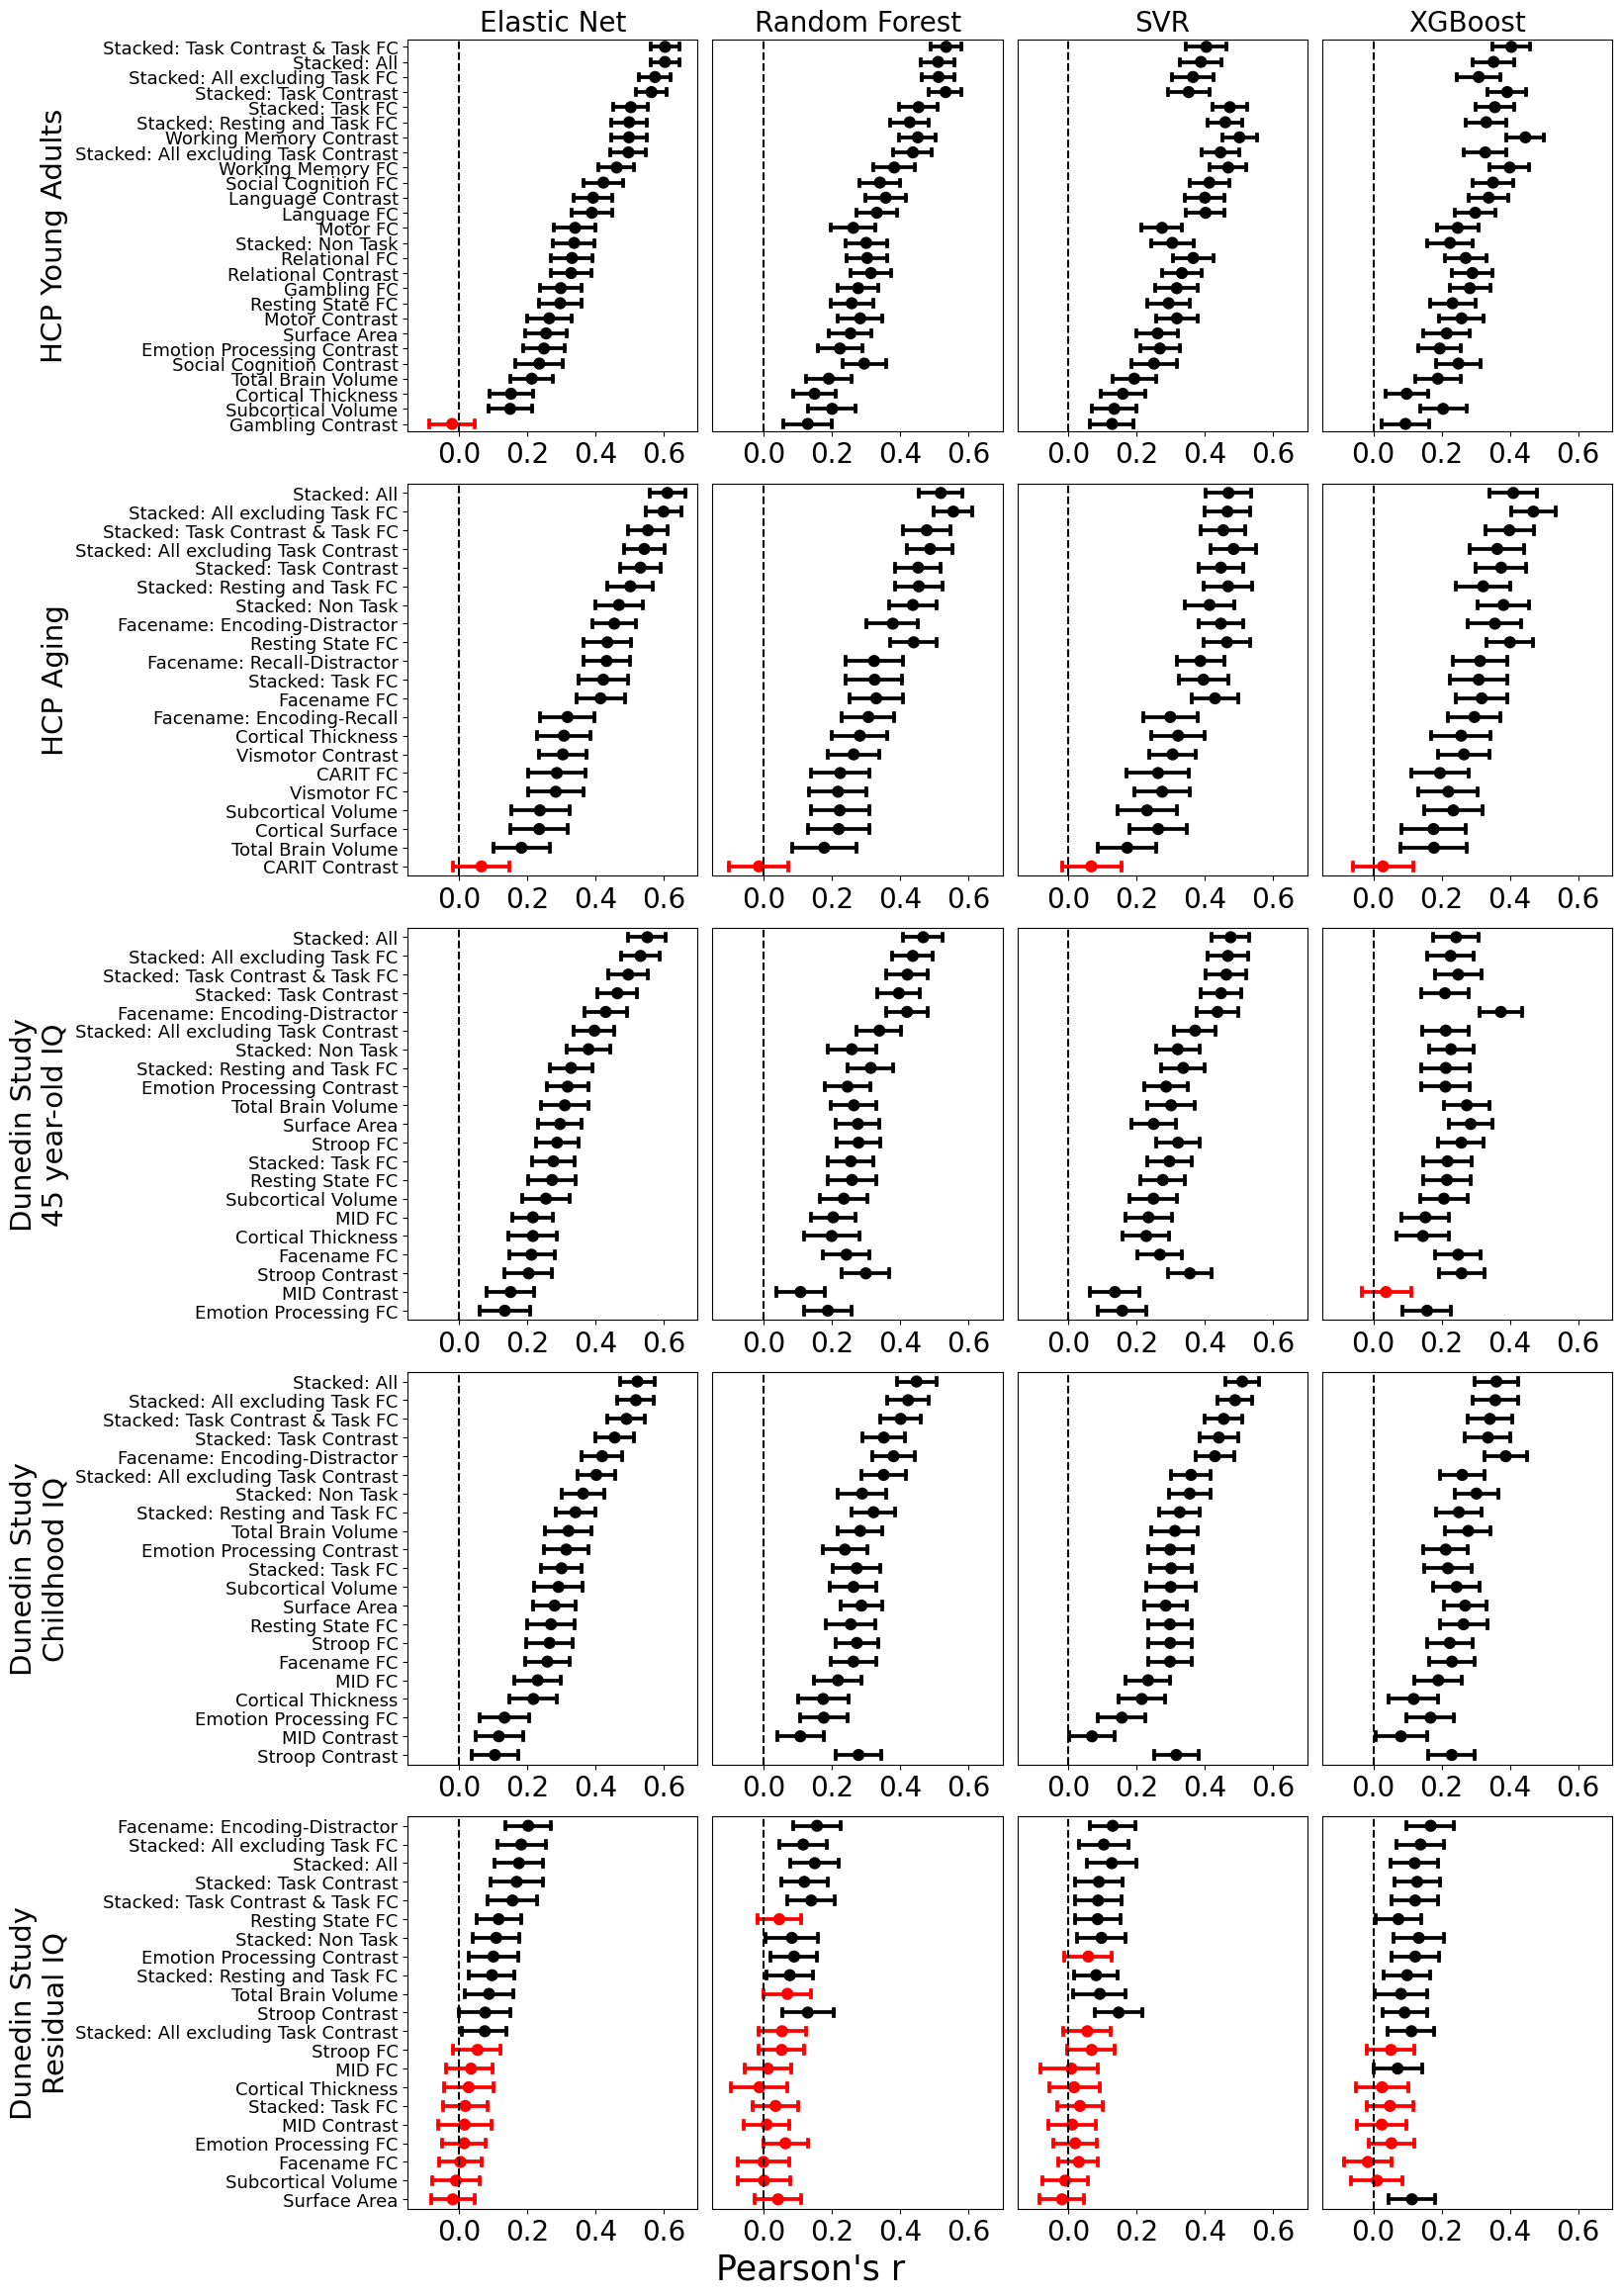

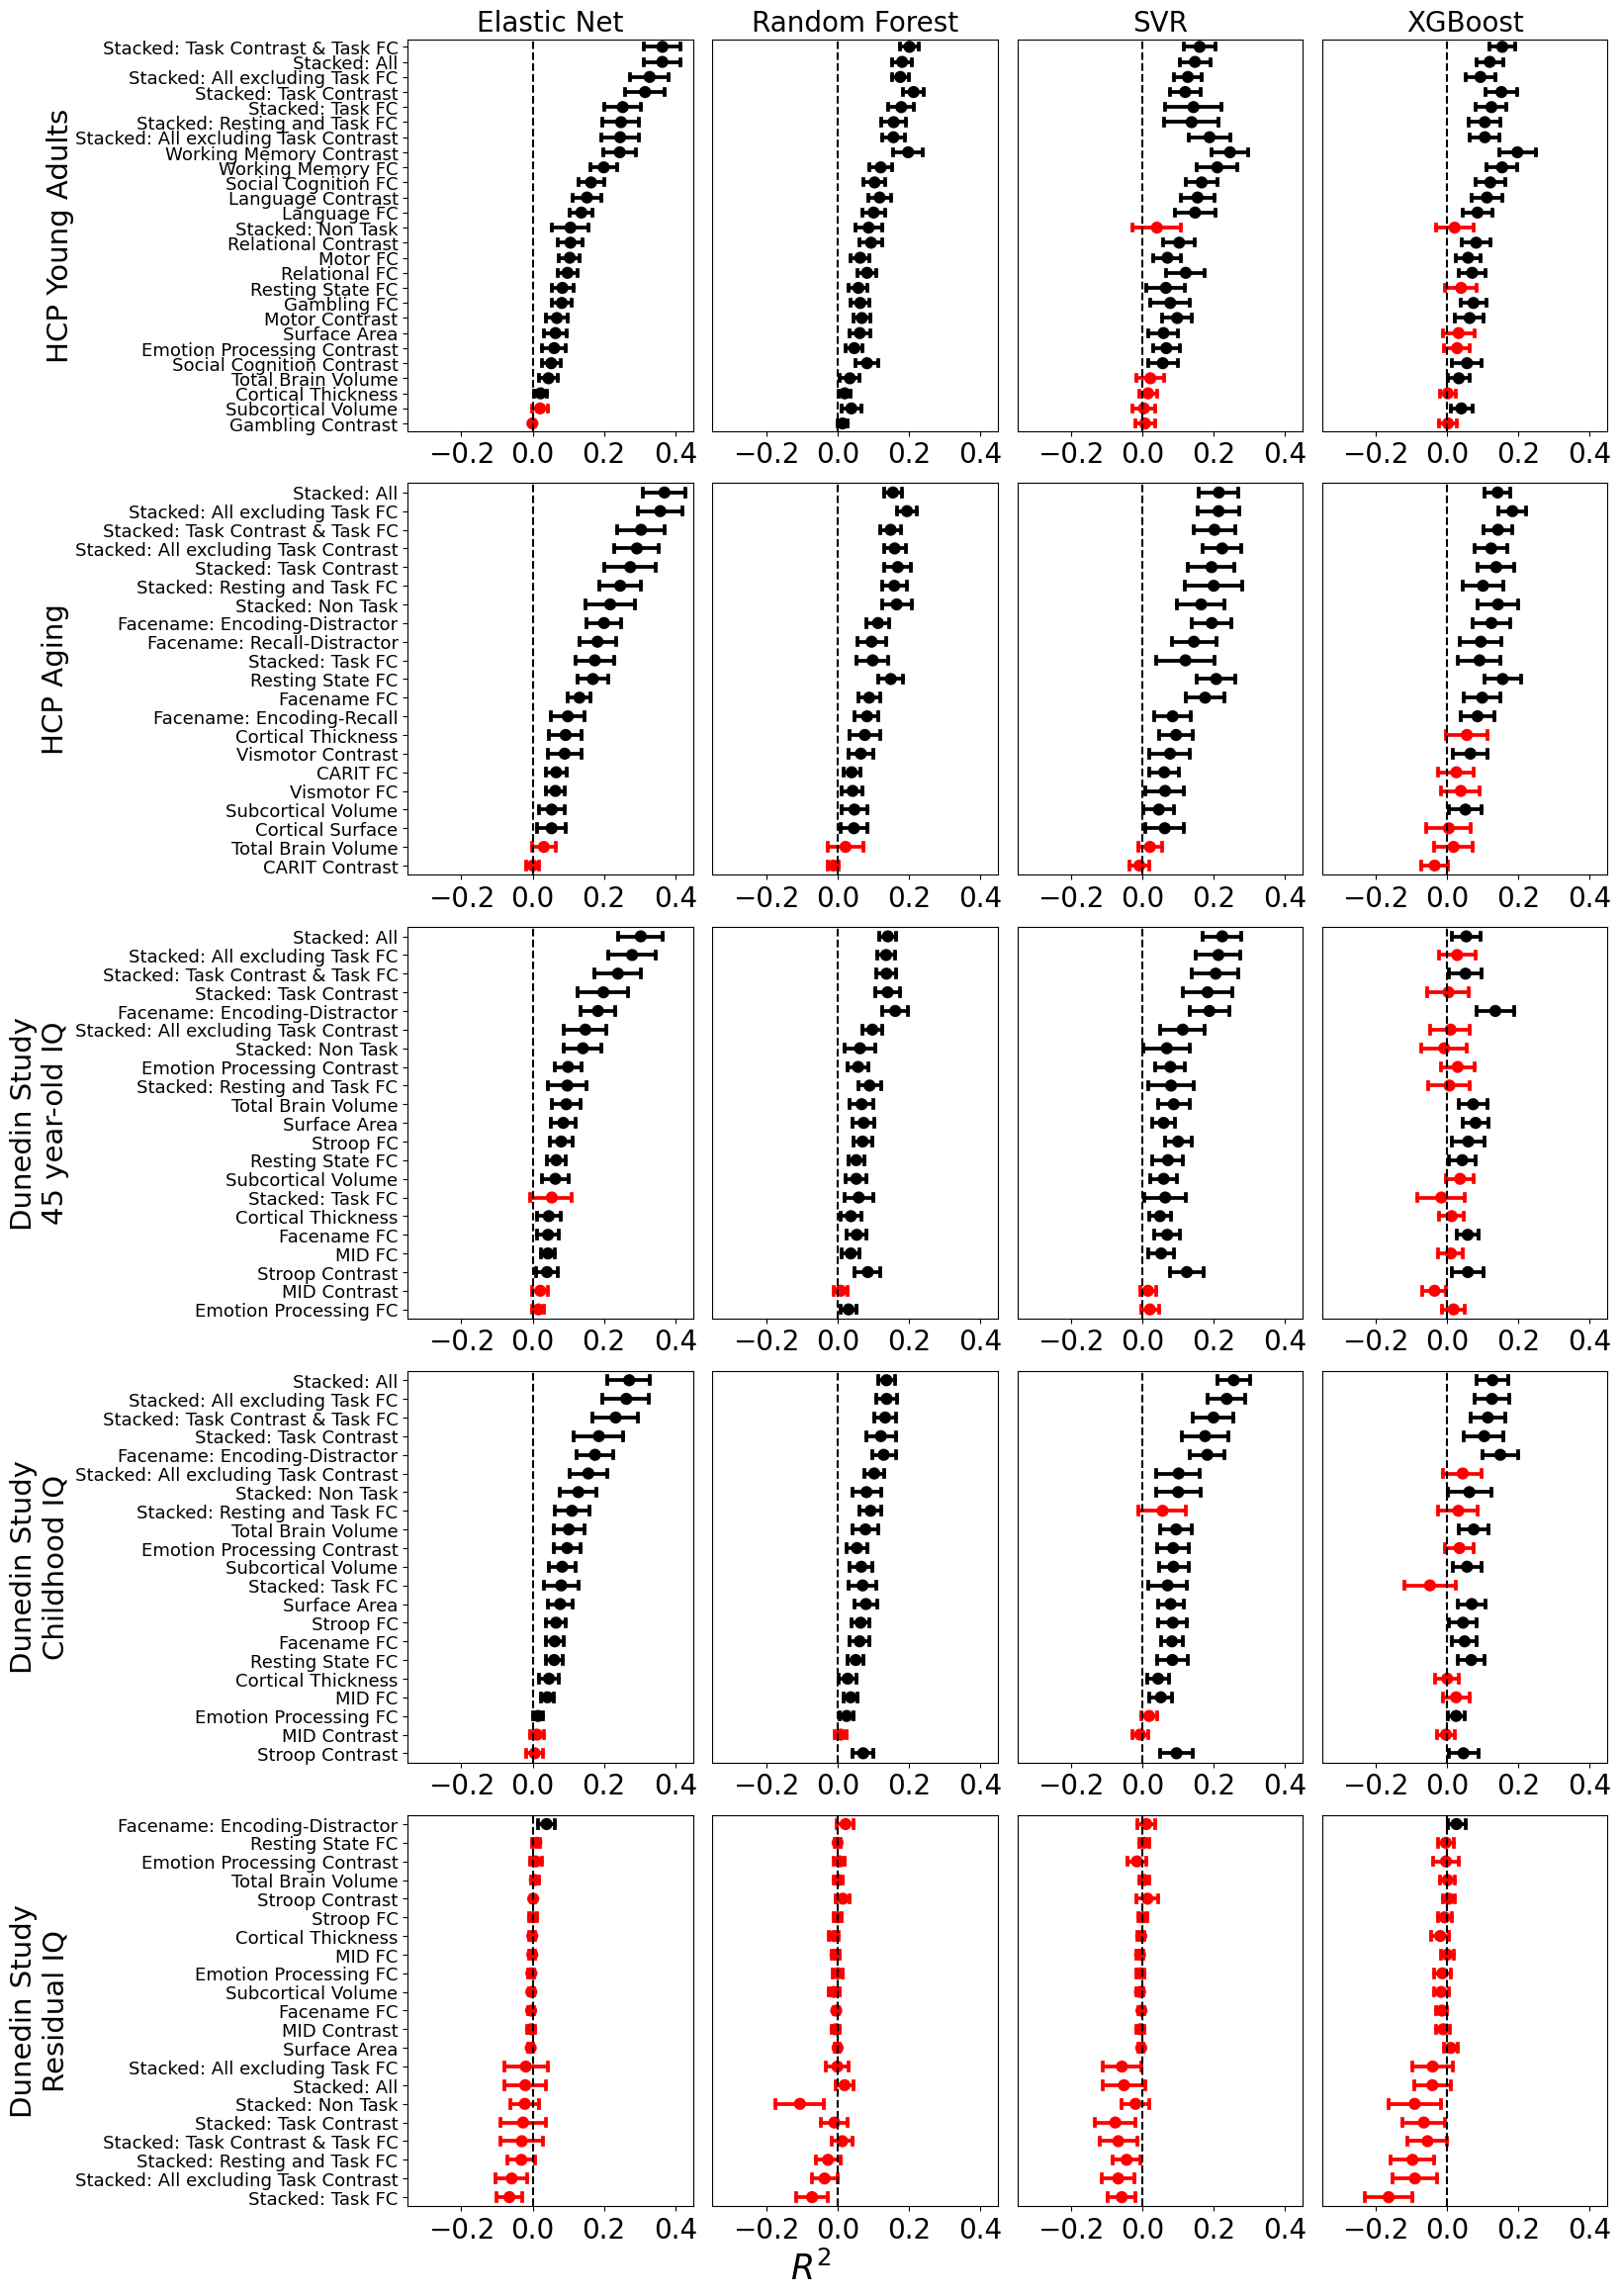

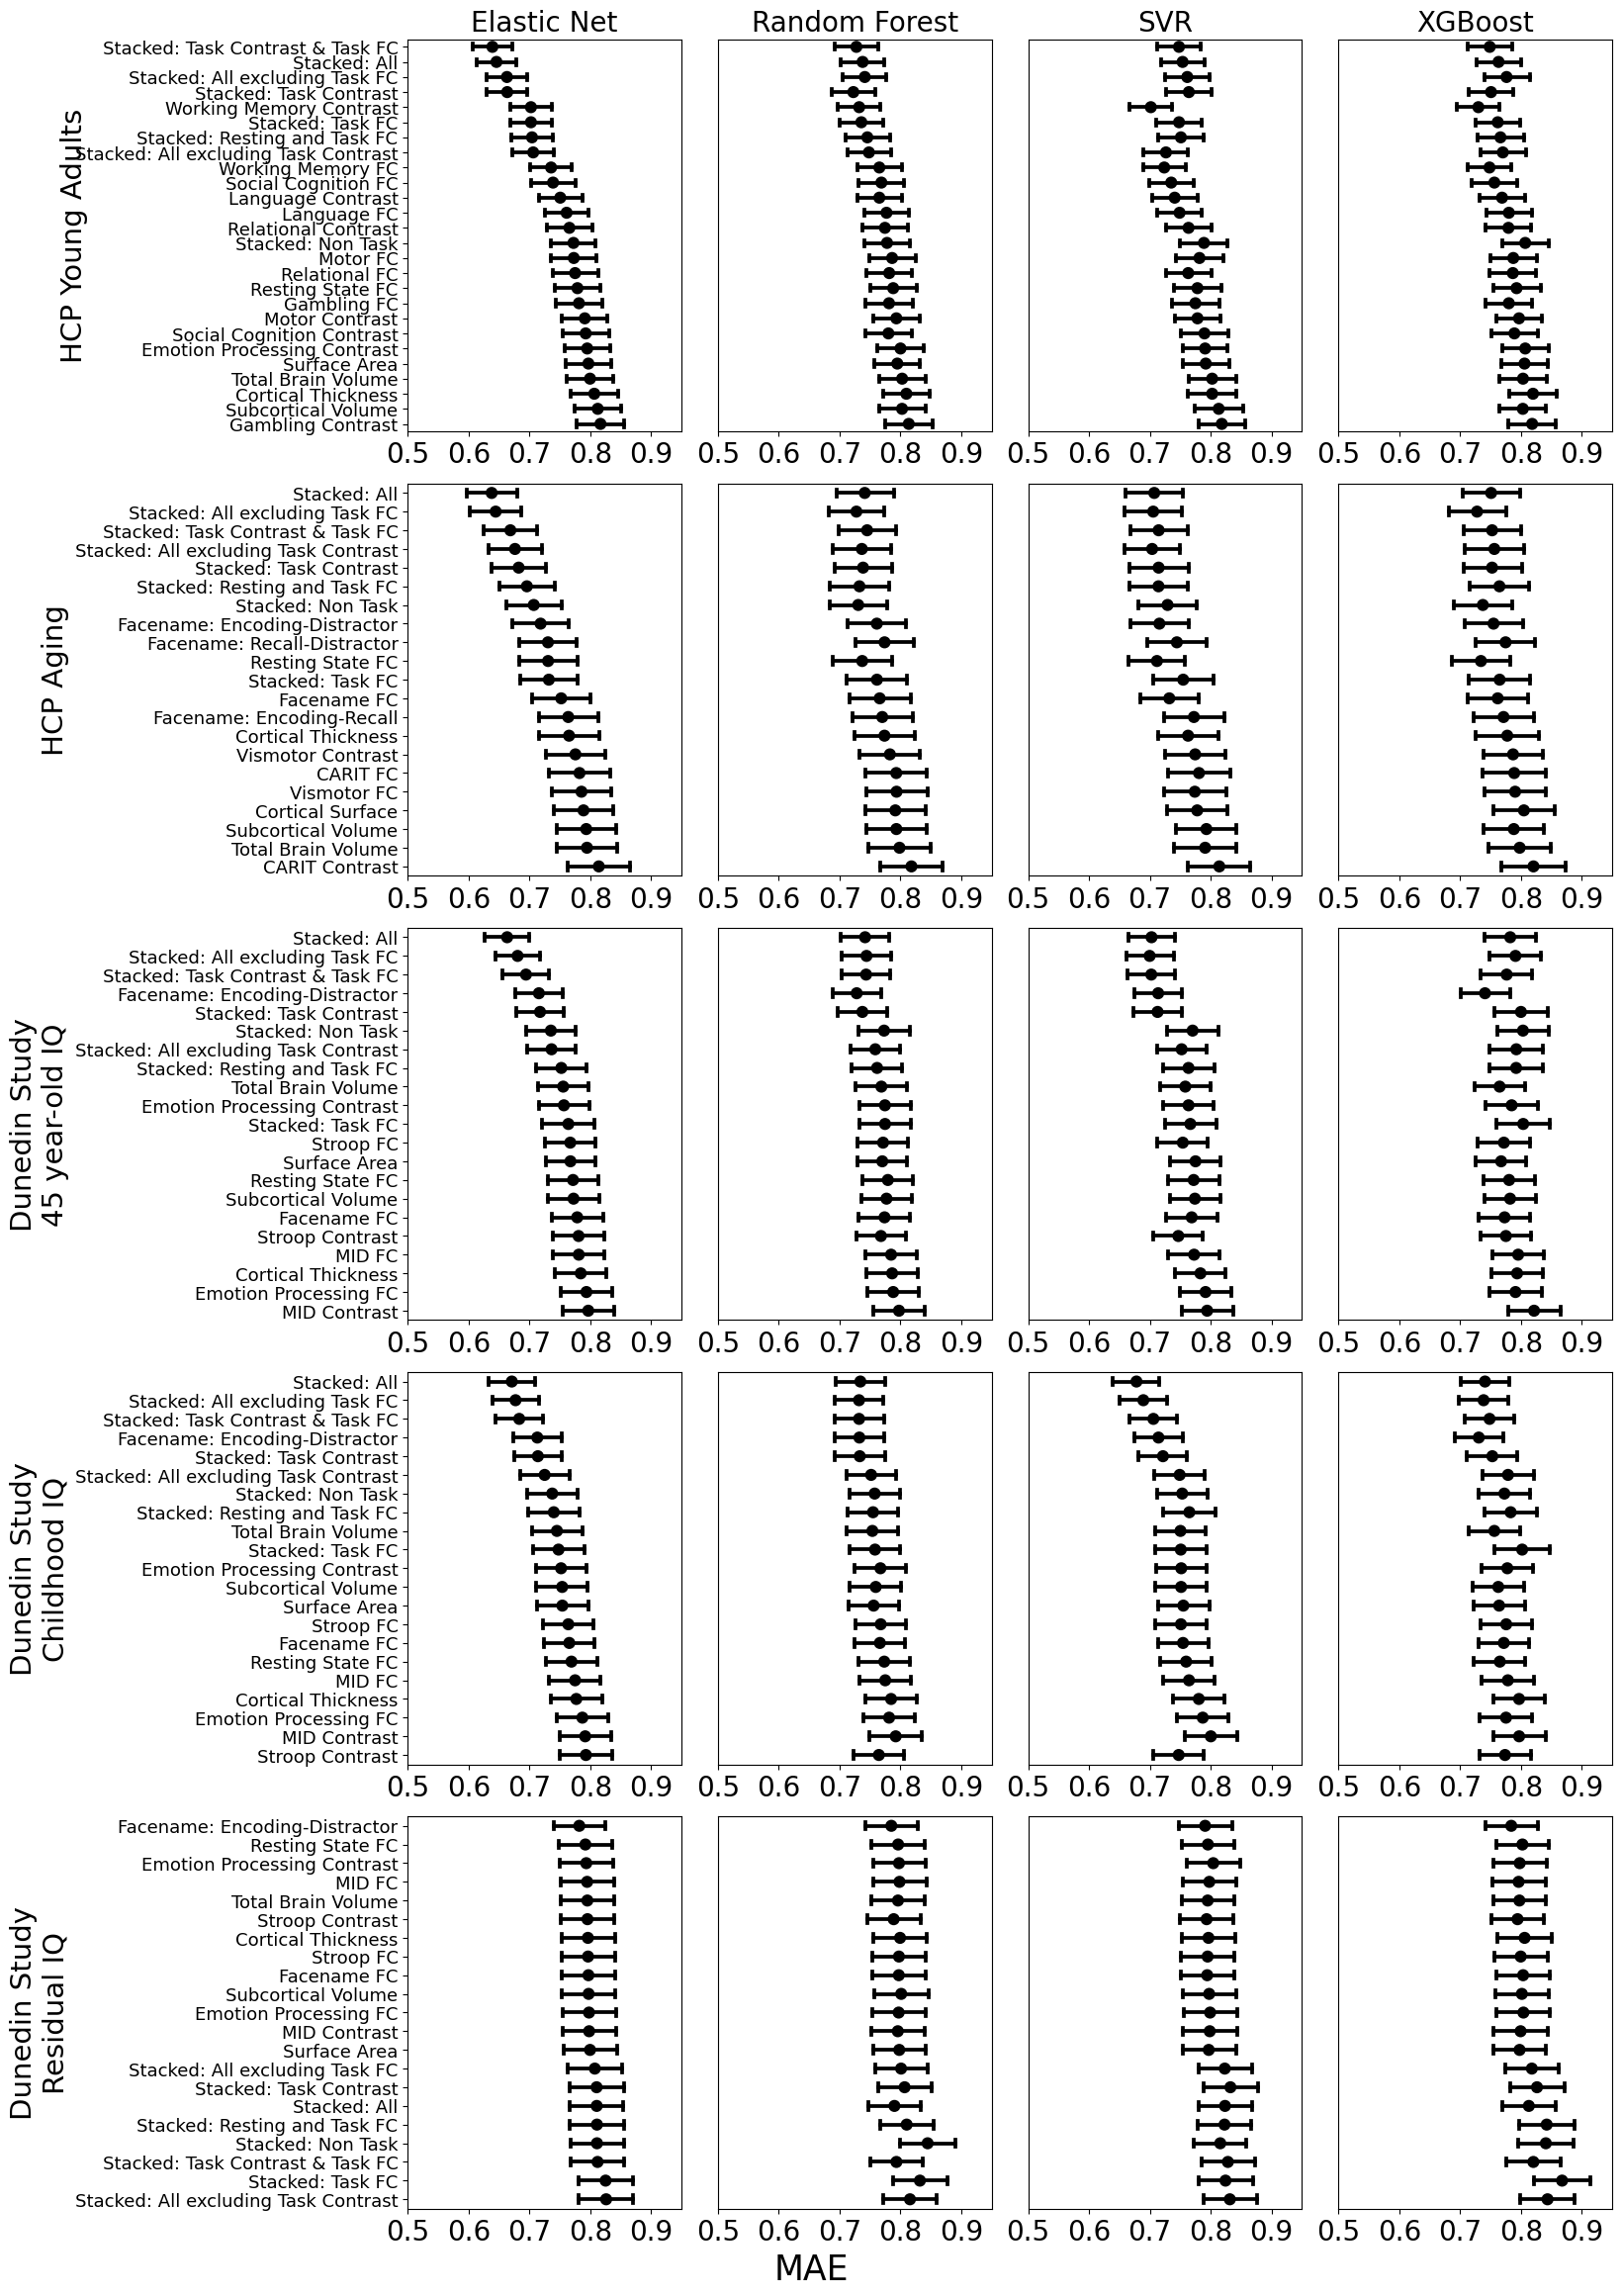

In [12]:
for mlindex, mlindex_title, mlkey in zip([cor_boot, r2_boot, mae_boot], 
                                         ["Pearson's r", '$R^2$', 'MAE'], 
                                         ['COR', 'R2', 'MAE']):
    





    fig = plt.figure(figsize=(16.5,23.4))
    i=1
    algs = ['eNet', 'RF', 'SVR', 'XGB']
    algs_nm = ['Elastic Net', 'Random Forest', 'SVR', 'XGBoost']


    for KEY, KEY_dn in zip(['YA', 'A', 'DUD', 'DUD_ch', 'DUD_res'],['HCP Young Adults',
                                                                    'HCP Aging',
                                                                    'Dunedin Study\n45 year-old IQ',
                                                                    'Dunedin Study\nChildhood IQ',
                                                                    'Dunedin Study\nResidual IQ']):

        vec_alg = copy.deepcopy(algs)

        for alg,alg_nm  in zip(algs, algs_nm):
            vec_alg = copy.deepcopy(algs)
            vec_alg.remove(alg)

            lbls_alg = [i for i in Median[KEY].index if alg in i and (vec_alg[0] not in i and vec_alg[1] not in i and vec_alg[2] not in i) ]
            
            if mlkey == 'MAE':
                ascending = True
            else:
                ascending = False
            
            data = mlindex[KEY].reindex(columns= mlindex[KEY].reindex(columns=lbls_alg).median().sort_values(ascending=ascending).index )

            data.columns = [i.split(',')[0] for i in data.columns]

            if alg == 'eNet':
                alg_enet_lbl = data.columns
                alg_enet_lbl = [i.split(',')[0] for i in alg_enet_lbl]

            data = data.reindex(columns = alg_enet_lbl)
            
            my_pal = []
            for col in data.columns:
                #
                ci1 = st.t.interval(0.95, df=len(data.index)-1, loc=np.mean(data[col]), scale=np.std(data[col]))[0]
                #
                if ci1 <=0:
                    my_pal += ['red']
                else:
                    my_pal += ['black']
            
            
            plt.subplot(5,4,i)
            
            def my_func(vec):
                ci = st.t.interval(0.95, df=len(vec)-1, loc=np.mean(vec), scale=np.std(vec))
                return ci
            
            ax = sns.pointplot(data = data, orient='h',  
                               estimator='median', errorbar=my_func, 
                               capsize=.4, join=False, palette=my_pal) #color='gray')
            #ax = sns.boxplot(data=data, orient="h")
            #ax = sns.swarmplot(data=data, color=".25", orient="h")
            plt.axvline(x=0, c='black', linestyle='--')

            if i not in [1,5,9,13,17]:
                plt.yticks([])
            else:
                plt.yticks(fontsize=13)

            if i in [1,5,9,13,17]:
                #plt.ylabel(KEY, fontsize=21)
                ax.set_ylabel(KEY_dn, fontsize=21) #ha='left',rotation=90,
                if KEY=='YA':
                    ax.set_ylabel(KEY_dn, fontsize=21) # loc='center', ha='left',rotation=90,
                    ax.yaxis.set_label_coords(x=-1.17, y=0.5)

            plt.xticks(fontsize=20) 

            if mlkey == 'COR':
                plt.xlim((-0.15,0.7))
            if mlkey == 'R2':
                plt.xlim((-0.35,0.45))
            if mlkey == 'MAE':
                plt.xlim((0.5,0.95))

            if i in np.arange(1,5,1):
                plt.title(alg_nm ,fontsize=20)

            i+=1

    fig.supxlabel(mlindex_title, fontsize=25)
    fig.tight_layout()   
    
    plt.savefig(path_out+mlkey+'_plot_BOOT_image.svg')
    
    plt.show()

##### plot the supplementary combinations (different algs on 1 and on 2 layers)

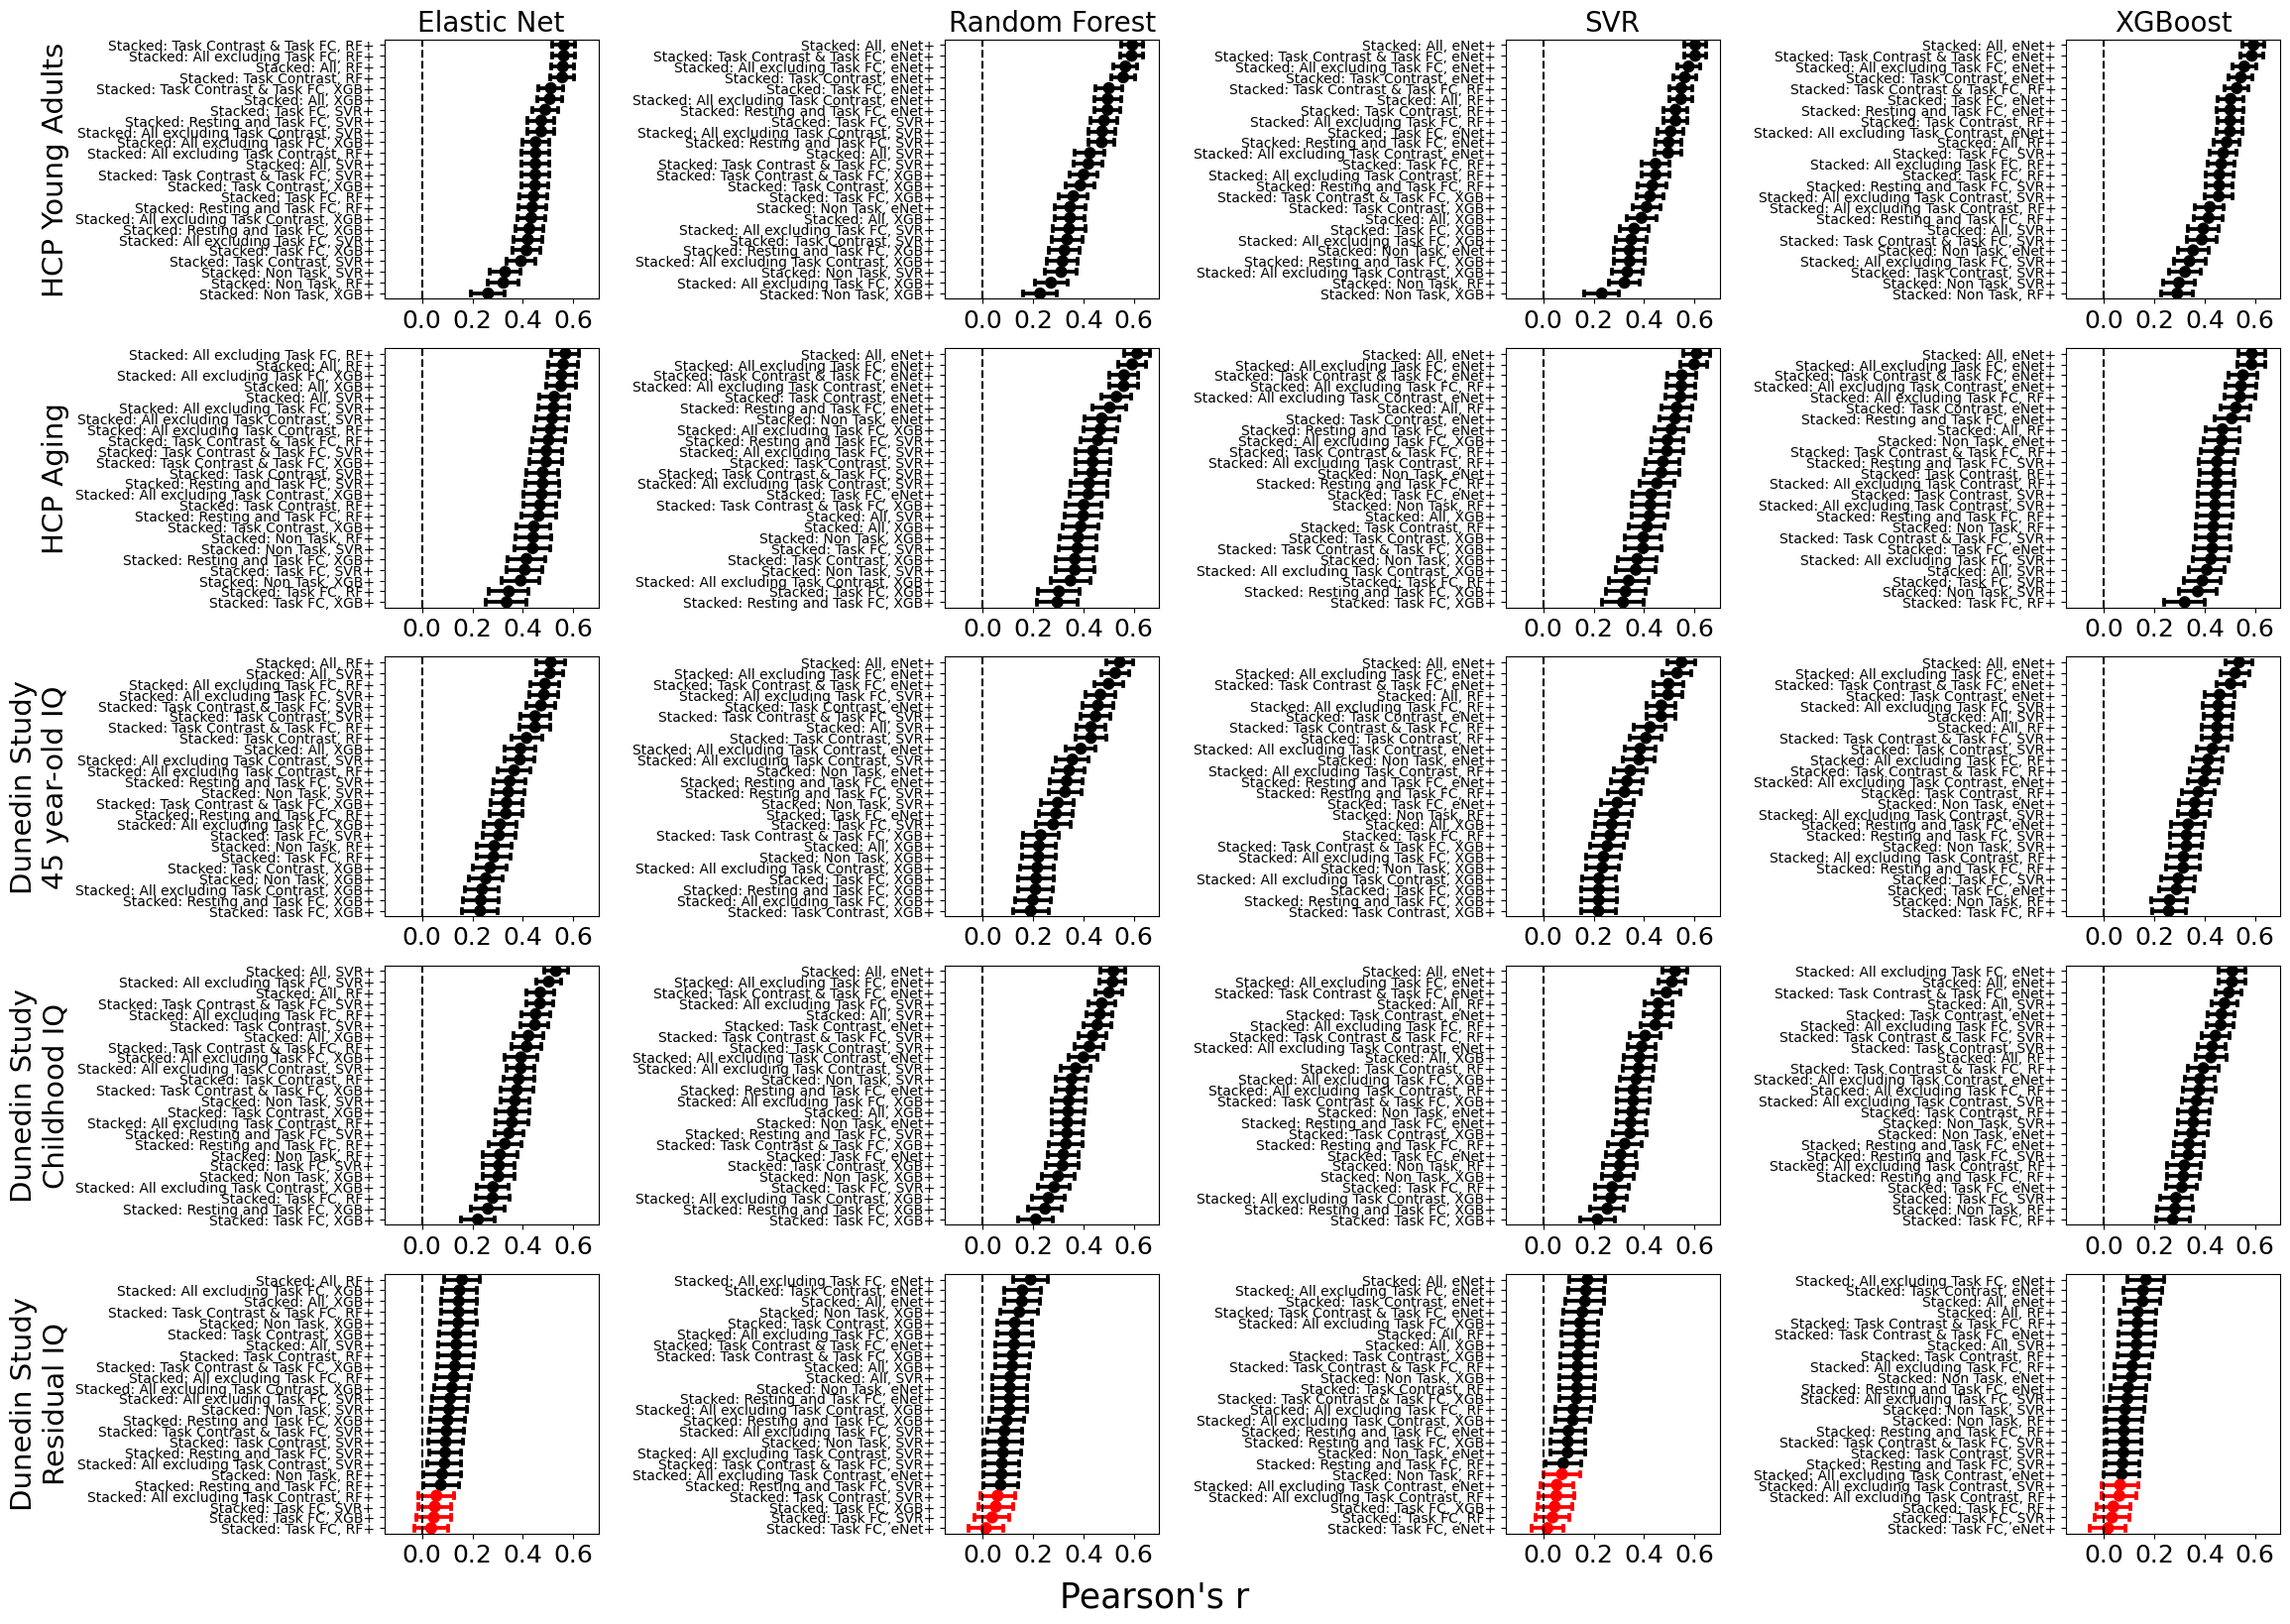

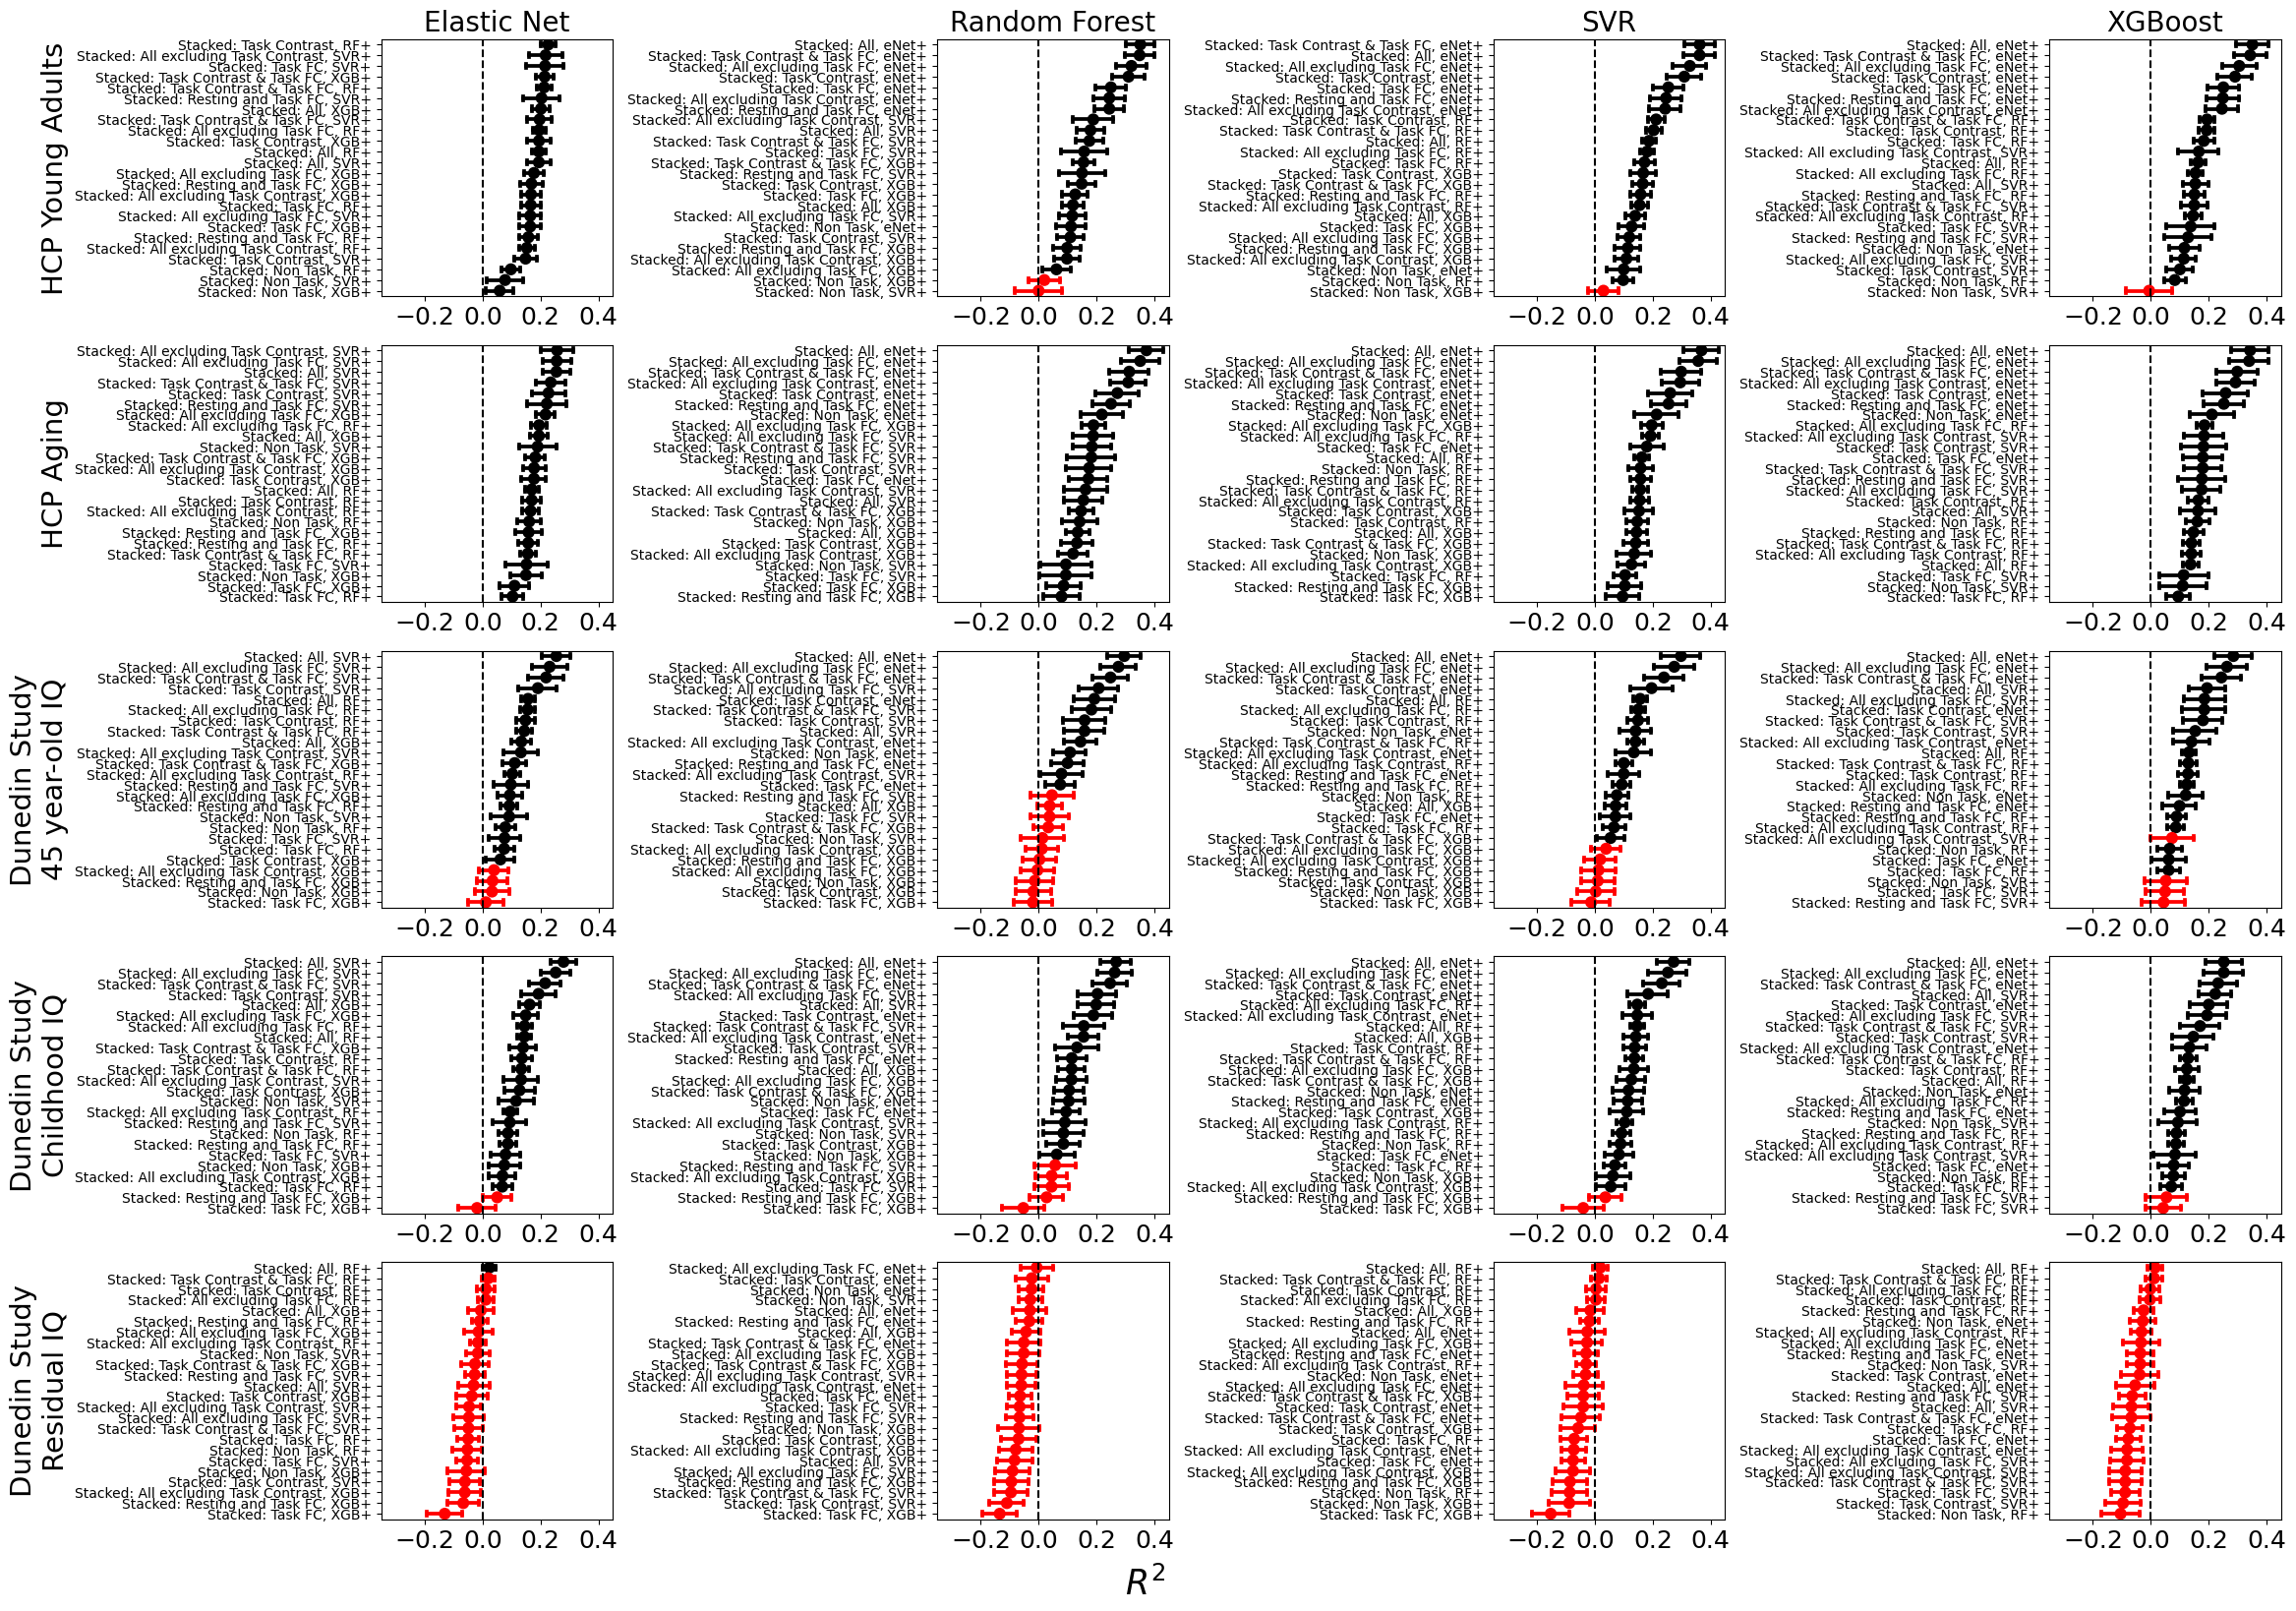

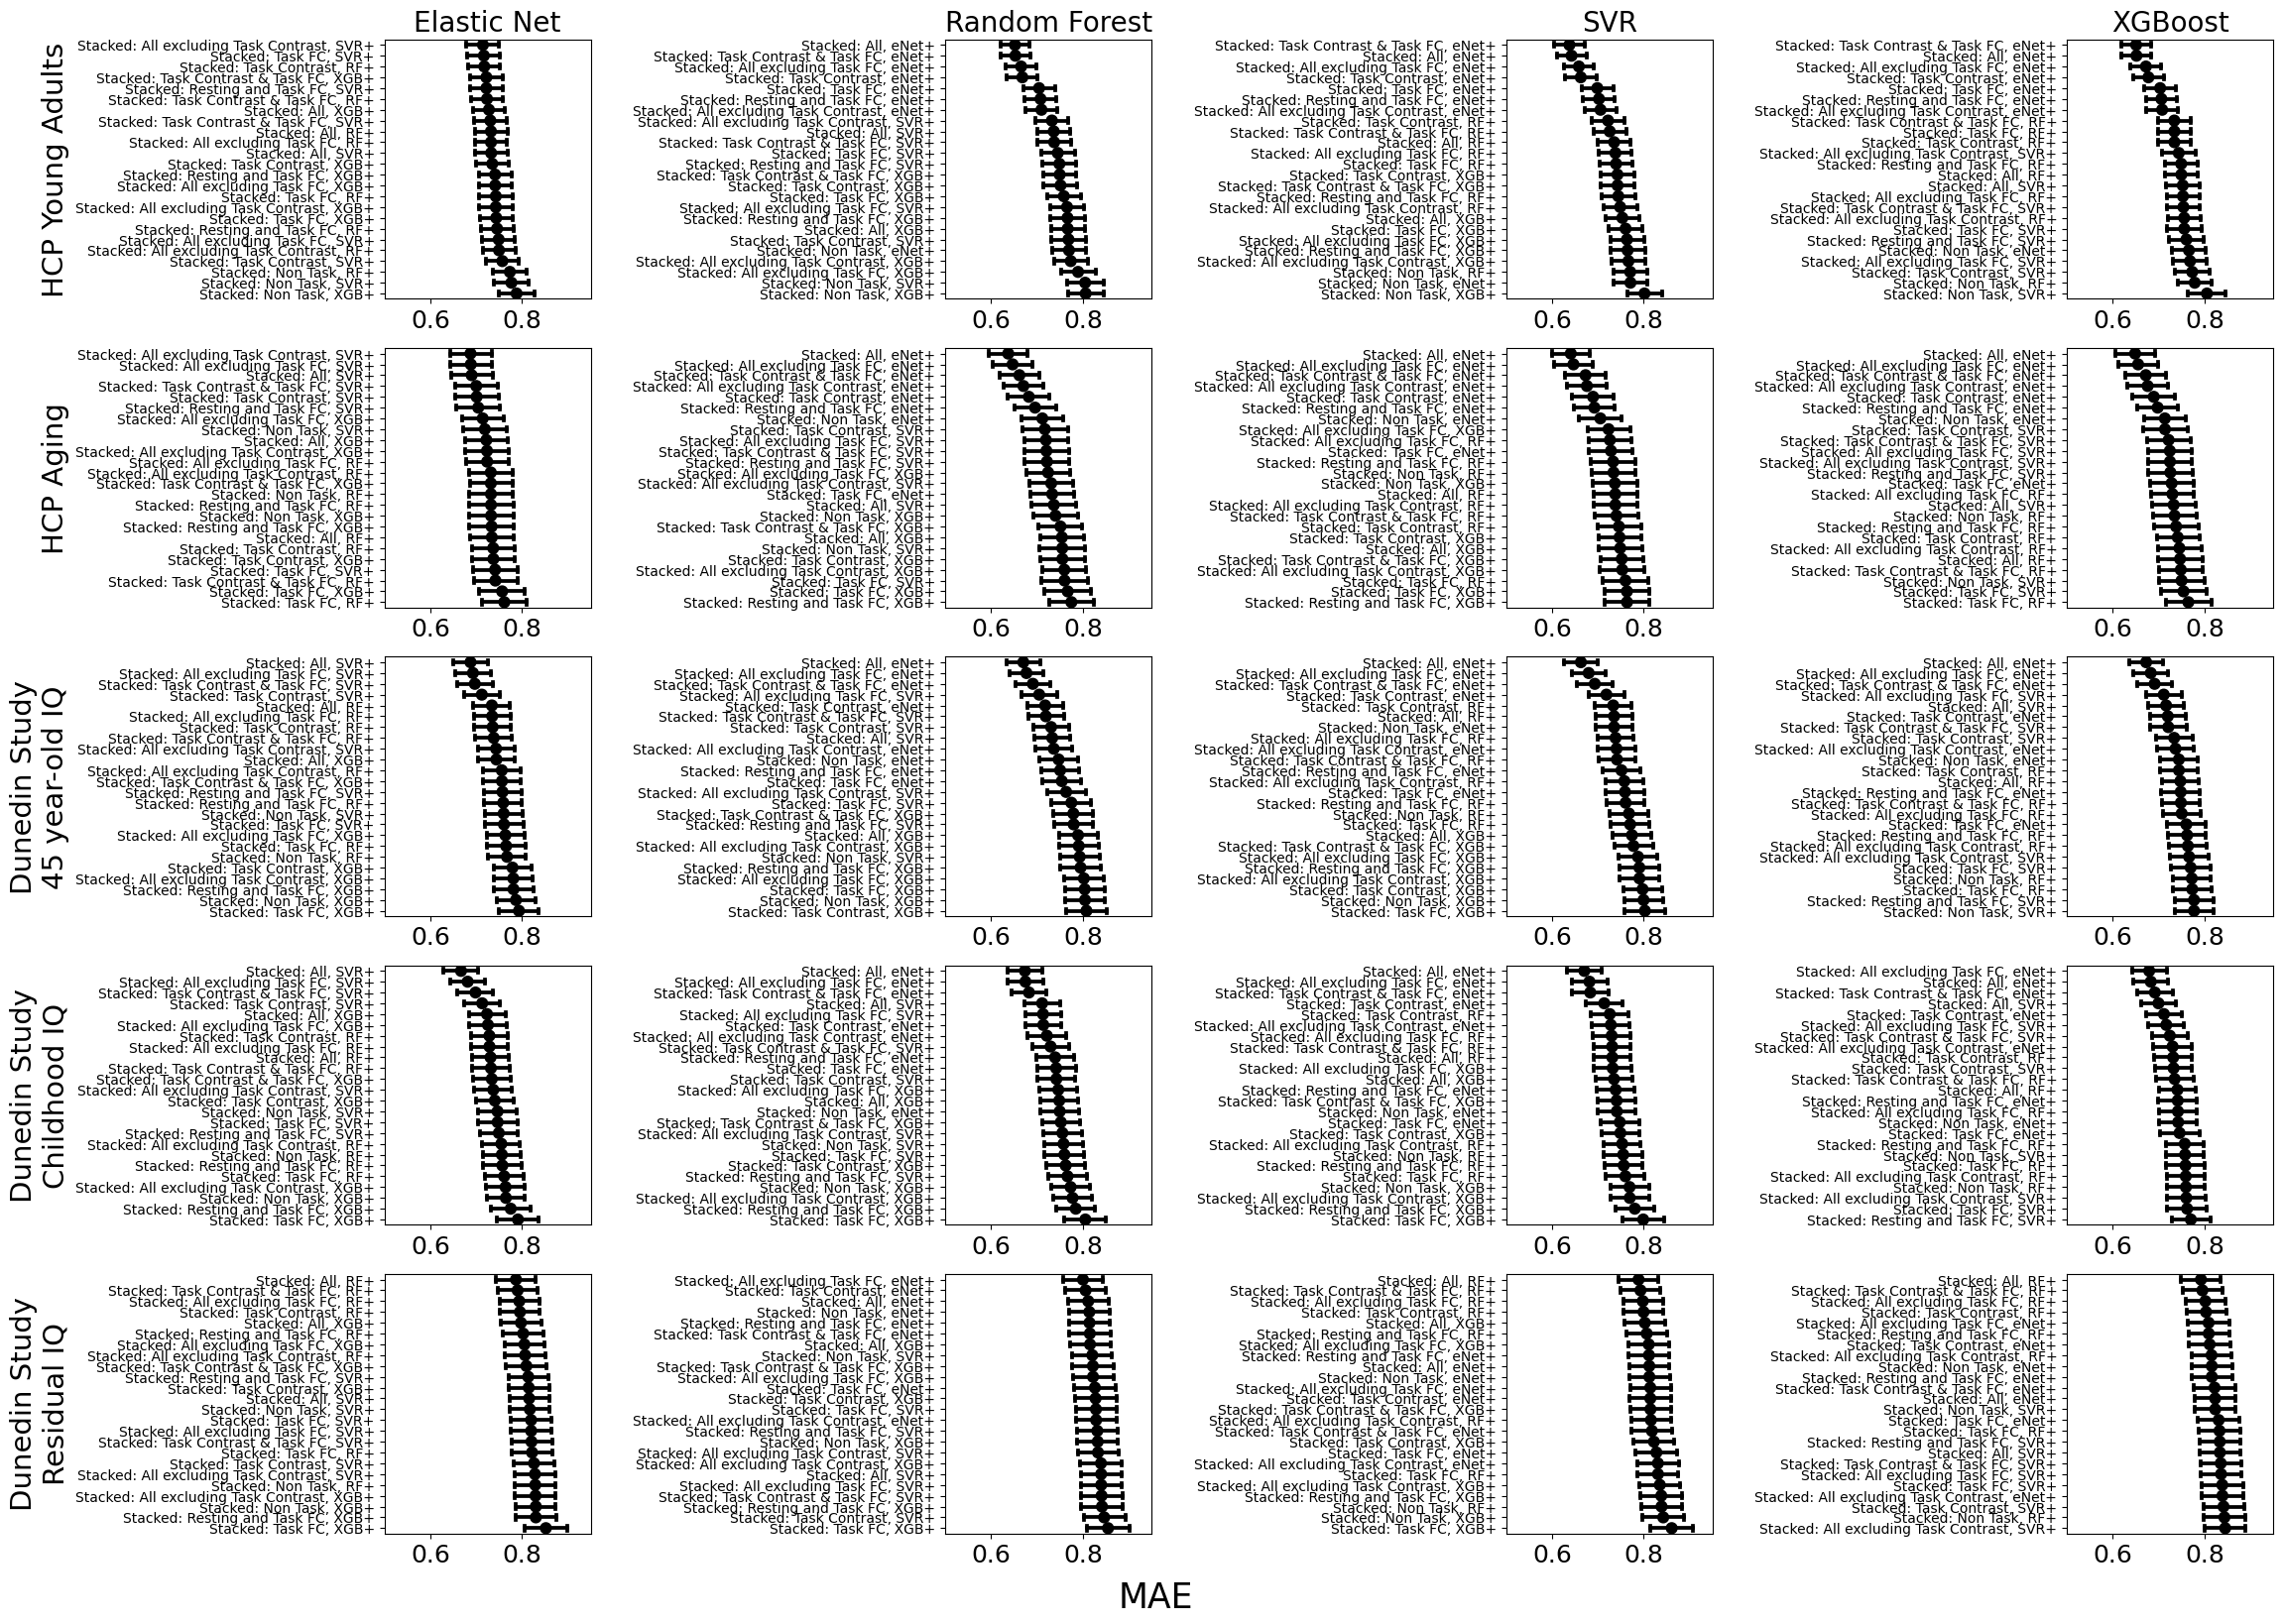

In [13]:
for mlindex, mlindex_title, mlkey in zip([cor_boot, r2_boot, mae_boot], 
                                         ["Pearson's r", '$R^2$', 'MAE'], 
                                         ['COR', 'R2', 'MAE']):
    

    fig = plt.figure(figsize=(23.4,16.5))
    i=1
    algs = ['eNet', 'RF', 'SVR', 'XGB']
    algs_nm = ['Elastic Net', 'Random Forest', 'SVR', 'XGBoost']


    for KEY, KEY_dn in zip(['YA', 'A', 'DUD', 'DUD_ch', 'DUD_res'],['HCP Young Adults',
                                                                    'HCP Aging',
                                                                    'Dunedin Study\n45 year-old IQ',
                                                                    'Dunedin Study\nChildhood IQ',
                                                                    'Dunedin Study\nResidual IQ']):

        vec_alg = copy.deepcopy(algs)

        llist=[]

        for alg in algs:
            vec_alg = copy.deepcopy(algs)
            vec_alg.remove(alg)

            lbls_alg = [i for i in Median['YA'].index if alg in i and (vec_alg[0] not in i and vec_alg[1] not in i and vec_alg[2] not in i) ]
            llist.extend(lbls_alg)
        vvec = [i for i in Median['YA'].index if i not in llist]

        for alg,alg_nm  in zip(algs, algs_nm):
            rlabel = [i for i in vvec if '+'+alg in i]

            if mlkey == 'MAE':
                ascending = True
            else:
                ascending = False
            
            
            data = mlindex[KEY].reindex(columns= mlindex[KEY].reindex(columns=rlabel).median().sort_values(ascending=ascending).index )

            data.columns = [i.split('+')[0]+'+' for i in data.columns]

            #if alg == 'eNet':
            #    alg_enet_lbl = data.columns

            #data = data.reindex(columns = alg_enet_lbl)

            my_pal = []
            for col in data.columns:
                #
                ci1 = st.t.interval(0.95, df=len(data.index)-1, loc=np.mean(data[col]), scale=np.std(data[col]))[0]
                #
                if ci1 <=0:
                    my_pal += ['red']
                else:
                    my_pal += ['black']

            plt.subplot(5,4,i)
            
            def my_func(vec):
                ci = st.t.interval(0.95, df=len(vec)-1, loc=np.mean(vec), scale=np.std(vec))
                return ci
            
            ax = sns.pointplot(data = data, orient='h',  
                               estimator='median', errorbar=my_func, 
                               capsize=.4, join=False, palette=my_pal) #color='gray')            
            #ax = sns.boxplot(data=data, orient="h")
            #ax = sns.swarmplot(data=data, color=".25", orient="h")
            plt.axvline(x=0, c='black', linestyle='--')

            #if i not in [1,5,9,13,17]:
            #    plt.yticks([])
            #else:
            plt.yticks(fontsize=10)

            if i in [1,5,9,13,17]:
                #plt.ylabel(KEY, fontsize=21)
                ax.set_ylabel(KEY_dn,fontsize=21) #, ha='left',rotation=90
                if KEY=='YA':
                    ax.set_ylabel(KEY_dn, fontsize=21) #, ha='left',rotation=90,
                    #ax.yaxis.set_label_coords(x=-2, y=0.5)

            plt.xticks(fontsize=18) 

            if mlkey == 'COR':
                plt.xlim((-0.15,0.7))
            if mlkey == 'R2':
                plt.xlim((-0.35,0.45))
            if mlkey == 'MAE':
                plt.xlim((0.5,0.95))

            if i in np.arange(1,5,1):
                plt.title(alg_nm ,fontsize=20)

            i+=1

    fig.supxlabel(mlindex_title, fontsize=25)
    fig.tight_layout()   
    
    plt.savefig(path_out+mlkey+'_plot_BOOT_image_supl.svg')
    
    plt.show()